**Assignment 7**
Demonstrate  the mean  adapted  GMM for  an arbitrary  set  of  data
Find the % of  unadapted  Gaussians in the  class  dependent  model  compared  with the  class independent  UBM 


In [1]:
#Import recommended libraries

from GMMlibrary import GaussianMixture
import copy
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from pandas import DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import glob
import sys
np.random.seed(42) 
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import multivariate_normal

In [2]:
class train_GMM:
    def returnGMM(features, NUMBER_OF_GAUSSIAN):
        X=features
        model=GaussianMixture(gaussians=K, n_iters = 500, tol = 0.00001, seed = 42)
        model.fit(X)
        return model
    
class opt:
    def normalize_meanvector(weight, var, mean_vec):
        print("Shape(mean_vec)", np.shape(mean_vec))
        normalize_mean = np.zeros(np.shape(mean_vec), dtype=np.float32)
        [NUMBER_OF_GAUSSIAN, FEATURE_ORDER] = np.shape(mean_vec)
        for ii in range(0, NUMBER_OF_GAUSSIAN):
            normalize_mean[ii, :] = np.sqrt(weight[ii]) * \
                            (1 / np.sqrt(var[ii, :])) * mean_vec[ii, :]
        return normalize_mean

2


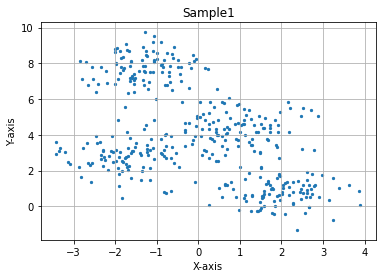

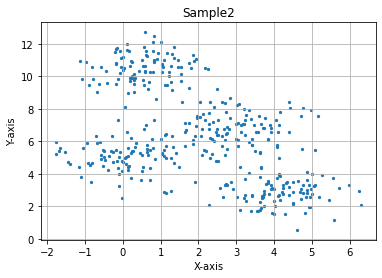

In [3]:
K=4

from sklearn.datasets.samples_generator import make_blobs
Data, y_true = make_blobs(n_samples=400, centers=K,
                       cluster_std=0.8, random_state=0)
# ===========================
# parameters    
# ===========================
df = pd.DataFrame(data=Data, columns=["X", "Y"])

FEATURE_ORDER = Data.shape[1]
print(FEATURE_ORDER)
NUMBER_OF_GAUSSIAN = K
RAND_VAL = 1.1
RAND_MEAN = 2
SCALING_FACTOR = 0.001


sample1 = Data

sample2 = Data * RAND_VAL + RAND_MEAN


#Plot 2D

plt.scatter(sample1[:, 0], sample1[:, 1], s=5)
plt.title("Sample1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()


plt.scatter(sample2[:, 0], sample2[:, 1], s=5)
plt.title("Sample2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()



...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -1873.4142017331387
Iteration:  1   log_likelihood:  -1662.0667768717558
Iteration:  2   log_likelihood:  -1647.7124285138052
Iteration:  3   log_likelihood:  -1631.3898752340924
Iteration:  4   log_likelihood:  -1615.656969070846
Iteration:  5   log_likelihood:  -1602.3382487046847
Iteration:  6   log_likelihood:  -1590.4053122156115
Iteration:  7   log_likelihood:  -1576.8408758992575
Iteration:  8   log_likelihood:  -1564.7031073522342
Iteration:  9   log_likelihood:  -1558.5023546841107
Iteration:  10   log_likelihood:  -1553.762331423833
Iteration:  11   log_likelihood:  -1548.4284573710847
Iteration:  12   log_likelihood:  -1541.7183196116896
Iteration:  13   log_likelihood:  -1533.8799148978355
Iteration:  14   log_likelihood:  -1527.639227692514
Iteration:  15   log_likelihood:  -1523.7493144530818
Iteration:  16   log_likelihood:  -1521.1761639304532
Iteration:  17   log_likelihood:  -1519.2281545365965
Iteration:

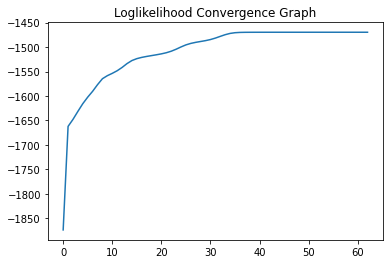

In [4]:
# training init GMM to create UBM
GMM_train_by_sample1 = train_GMM.returnGMM(sample1, NUMBER_OF_GAUSSIAN)

##Posterior Probability of Noisy Dataset :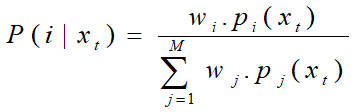

In [5]:
# Posterior probabilities for K NUMBER_OF_GAUSSIAN

probability_of_Sample2_on_UBM = GMM_train_by_sample1.compute_log_likelihood(sample2)
label_of_Sample2_on_UBM = GMM_train_by_sample1.predict(sample2)


print("\n Predicted_values_Sample 2 before Updation: \n: ",label_of_Sample2_on_UBM)

print("\n Sample2 Probability", probability_of_Sample2_on_UBM)

print("\n Sample2 Probability", probability_of_Sample2_on_UBM.sum(1))




 Predicted_values_Sample 2 before Updation: 
:  [2 0 1 2 2 1 3 2 2 2 1 3 2 1 2 2 2 3 2 2 2 2 1 2 2 1 1 2 2 3 2 2 2 2 2 1 2
 2 2 2 2 1 3 1 3 1 3 3 3 1 1 1 2 1 1 0 2 3 2 2 2 3 2 2 2 2 3 1 2 1 2 2 2 1
 2 2 2 2 1 2 1 2 3 1 2 1 0 2 2 2 2 3 2 2 1 1 2 3 3 2 1 2 2 2 2 1 2 1 2 2 2
 2 2 2 1 3 1 2 1 1 2 2 2 1 2 1 2 2 3 2 1 1 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 2 2 3 2 1 2 2 2 2 2 2 2 1 2 2 1 3 2 2 1 1 1 1 3 3 2 2 2 2 1 2 1 2 2 1
 2 1 2 2 1 2 2 1 2 1 1 1 3 3 2 2 2 3 3 1 2 2 1 2 1 2 2 3 3 1 3 2 1 2 1 2 2
 1 2 2 1 3 1 2 1 2 2 2 2 1 3 2 2 2 2 3 2 2 1 2 2 1 2 3 1 0 3 2 2 1 1 2 2 3
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 3 1 3 2 2 1 2 3 1 1 1 2 2 3 2 3 2 2 2 2 2
 3 2 2 2 1 1 2 1 2 3 2 1 1 2 3 2 1 2 3 2 3 1 1 2 2 2 2 2 2 1 2 1 2 2 1 2 1
 2 2 2 2 2 2 2 1 3 2 3 2 1 2 2 2 2 3 2 1 2 2 2 2 2 2 1 1 1 2 2 3 2 2 2 2 1
 2 2 2 2 1 2 1 1 0 1 2 1 2 2 2 2 1 1 1 1 2 1 2 3 2 2 2 3 2 3]

 Sample2 Probability [[3.79154482e-15 1.28140505e-02 9.87185950e-01 2.98827954e-23]
 [5.61145456e-01 5.00716498e-03 4.33847379e-01 2.65286

ni: 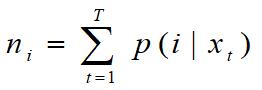

In [6]:
#N summation for K NUMBER_OF_GAUSSIAN
n_i = np.sum(probability_of_Sample2_on_UBM, axis=0)
print(n_i)

[  5.26812042 109.78779625 235.97549408  48.96858925]


Mean of Posterior Probaility on Noisy Image: 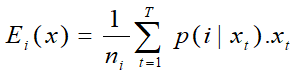

In [7]:
E = np.zeros((FEATURE_ORDER, NUMBER_OF_GAUSSIAN), dtype=np.float32)
print('Size of E', E.shape)

for ii in range(0, NUMBER_OF_GAUSSIAN):
    probability_gauss = np.tile(probability_of_Sample2_on_UBM[:, ii],(FEATURE_ORDER, 1)).T * sample2
    E[:, ii] = np.sum(probability_gauss, axis=0) / n_i[ii]

print('Size of E', E.shape)

Size of E (2, 4)
Size of E (2, 4)


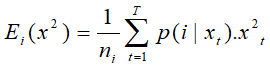

In [8]:
E2 = np.zeros((FEATURE_ORDER, NUMBER_OF_GAUSSIAN), dtype=np.float32)
print('Size of E', E.shape)

for ii in range(0, NUMBER_OF_GAUSSIAN):
    probability_gauss = np.tile(probability_of_Sample2_on_UBM[:, ii],(FEATURE_ORDER, 1)).T * sample2 * sample2
    E2[:, ii] = np.sum(probability_gauss, axis=0) / n_i[ii]

print('Size of E2', E2.shape)

Size of E (2, 4)
Size of E2 (2, 4)


Data dependent adaptation coefficient: 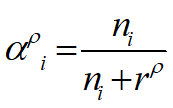

In [9]:
#Calculating Alpha

alpha = n_i / (n_i + SCALING_FACTOR)
print('alpha: ', alpha)

alpha:  [0.99981022 0.99999089 0.99999576 0.99997958]


In [10]:
# Fetching the other parameters (weights,covariance) from UBM model
weight = GMM_train_by_sample1.weights
var = np.mean(GMM_train_by_sample1.covs, axis=1)
print('weight: ', weight )
print('var: ', var )

weight:  [0.22398334 0.24459519 0.28904249 0.24237898]
var:  [[0.28252723 0.31005302]
 [0.2657128  0.34126043]
 [0.41641686 0.43447048]
 [0.29678702 0.23586283]]


Sufficient statistics Mean Updation: 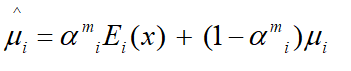

In [11]:
#Updating Means

old_mean = copy.deepcopy(GMM_train_by_sample1.means)
print('old_mean: ', old_mean )
new_mean = np.zeros((NUMBER_OF_GAUSSIAN, FEATURE_ORDER), dtype=np.float32)
print('new mean: ', new_mean )


# //Computing the new parameters for sample2
for ii in range(0, NUMBER_OF_GAUSSIAN):
    new_mean[ii,:] = (alpha[ii] * E[:,ii]) + ((1 - alpha[ii]) * old_mean[ii, :])
print('new mean: ', new_mean )

old_mean:  [[-1.76200679  2.73836185]
 [-1.30977302  7.76104313]
 [ 0.79324127  4.29746582]
 [ 1.94947489  0.77378781]]
new mean:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
new mean:  [[-1.0154988   4.2302127 ]
 [ 0.47059494 10.114495  ]
 [ 2.3021145   5.462094  ]
 [ 4.1784563   2.2981818 ]]


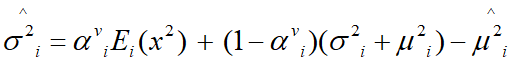

In [12]:
#Updating Variance

old_var = copy.deepcopy(var)
print('old_var: ', old_var )
new_var = np.zeros((NUMBER_OF_GAUSSIAN, FEATURE_ORDER), dtype=np.float32)
print('new var: ', new_var )


# //Computing the new parameters for sample2
for ii in range(0, NUMBER_OF_GAUSSIAN):
    new_var[ii,:] = (alpha[ii] * E2[:,ii]) + ((1 - alpha[ii]) * ((var[ii]*var[ii]) + (old_mean[ii]*old_mean[ii]))) - (new_mean[ii]*new_mean[ii])
print('new var: ', new_var)

old_var:  [[0.28252723 0.31005302]
 [0.2657128  0.34126043]
 [0.41641686 0.43447048]
 [0.29678702 0.23586283]]
new var:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
new var:  [[0.2760304  0.625049  ]
 [0.7366257  2.2759938 ]
 [2.9737163  2.3658667 ]
 [0.6733258  0.30193663]]


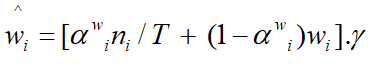

In [13]:
#Updating Weights
old_weights = copy.deepcopy(weight)
print('old_weights: ', old_weights )
new_weights = np.full(NUMBER_OF_GAUSSIAN, 1 / NUMBER_OF_GAUSSIAN)
print('new weights: ', new_weights)

# //Computing the new parameters for sample2
for ii in range(0, NUMBER_OF_GAUSSIAN):
    new_weights[ii] = (((alpha[ii]*n_i[ii])/NUMBER_OF_GAUSSIAN) + ((1 - alpha[ii]) * old_weights[ii]))/100
print('new_weights: ', new_weights)

old_weights:  [0.22398334 0.24459519 0.28904249 0.24237898]
new weights:  [0.25 0.25 0.25 0.25]
new_weights:  [0.01316823 0.27446701 0.58993625 0.12241902]


In [14]:
# get GMM supervector
norm_mean = opt.normalize_meanvector(new_weights, new_var, new_mean)
super_vector = np.reshape(norm_mean, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
                          
print('norm_mean: ', norm_mean )
print('super_vector: ', super_vector)


####For plotting graph
norm_mean_old = opt.normalize_meanvector(weight, var,old_mean)
super_vector_old = np.reshape(norm_mean_old, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)

print('norm_mean_old: ', norm_mean_old )
print('super_vector_old: ', super_vector_old )

Shape(mean_vec) (4, 2)
norm_mean:  [[-0.22180158  0.6140006 ]
 [ 0.28725585  3.5123982 ]
 [ 1.0253679   2.7275112 ]
 [ 1.7816716   1.4633591 ]]
super_vector:  [-0.22180158  0.6140006   0.28725585  3.5123982   1.0253679   2.7275112
  1.7816716   1.4633591 ]
Shape(mean_vec) (4, 2)
norm_mean_old:  [[-1.568864   2.327452 ]
 [-1.2566483  6.5705404]
 [ 0.6608791  3.5052028]
 [ 1.7617434  0.7844037]]
super_vector_old:  [-1.568864   2.327452  -1.2566483  6.5705404  0.6608791  3.5052028
  1.7617434  0.7844037]


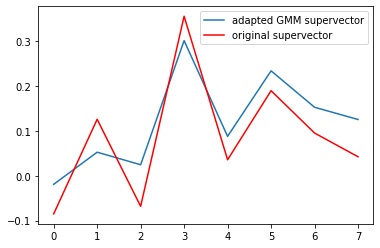

In [15]:
plt.figure()
plt.plot(super_vector / np.sum(np.abs(super_vector)))
plt.plot(super_vector_old / np.sum(np.abs(super_vector_old)), 'r')
plt.legend(['adapted GMM supervector', 'original supervector'])

...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -1949.662345576599
Iteration:  1   log_likelihood:  -1738.314920715216
Iteration:  2   log_likelihood:  -1723.9605723572654
Iteration:  3   log_likelihood:  -1707.6380190775524
Iteration:  4   log_likelihood:  -1691.9051129143058
Iteration:  5   log_likelihood:  -1678.5863925481444
Iteration:  6   log_likelihood:  -1666.6534560590717
Iteration:  7   log_likelihood:  -1653.0890197427177
Iteration:  8   log_likelihood:  -1640.9512511956943
Iteration:  9   log_likelihood:  -1634.750498527571
Iteration:  10   log_likelihood:  -1630.0104752672933
Iteration:  11   log_likelihood:  -1624.676601214545
Iteration:  12   log_likelihood:  -1617.96646345515
Iteration:  13   log_likelihood:  -1610.1280587412962
Iteration:  14   log_likelihood:  -1603.8873715359741
Iteration:  15   log_likelihood:  -1599.9974582965415
Iteration:  16   log_likelihood:  -1597.424307773913
Iteration:  17   log_likelihood:  -1595.4762983800565
Iteration:  18

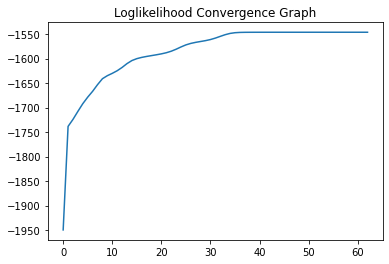

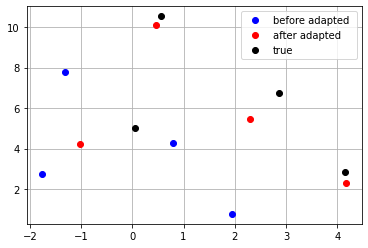

In [16]:
# ===========================
#Verification
# ===========================
sample2_many = sample2

testGMM_many = train_GMM.returnGMM(sample2_many, NUMBER_OF_GAUSSIAN) 
testGMM_many_mean = testGMM_many.means
#print('testGMM_many_mean', testGMM_many_mean)

plt.figure()
plt.plot(old_mean[:, 0], old_mean[:, 1], 'bo')
plt.plot(new_mean[:, 0], new_mean[:, 1], 'ro')
plt.plot(testGMM_many_mean[:, 0], testGMM_many_mean[:, 1], 'ko')
plt.legend(['before adapted ', 'after adapted', 'true'])
plt.grid(True)
#plt.xlim(-15,15)
#plt.ylim(-50,50)
plt.show()

In [17]:
# Accuracy after Adapating to UBM model via Parameter adjustment

Original_values_2 = testGMM_many.predict(sample2)
print("Original_values_Sample 2: \n", Original_values_2)

probability_1 = GMM_train_by_sample1.compute_log_likelihood(sample2)
Predicted_values_1 = np.argmax(probability_1,1)
print("\n Predicted_values_Sample 2 before Updation: \n",Predicted_values_1)

probability_of_Sample2_on_UBM = GMM_train_by_sample1.compute_log_likelihood_newmean(sample2,new_mean,new_var,new_weights)
Predicted_values_2 = np.argmax(probability_of_Sample2_on_UBM,1)
print("\n Predicted_values_Sample 2 after Updation: \n",Predicted_values_2)


def accuracy(label_values_1,label_of_Sample2_on_UBM):
    return(label_values_1==label_of_Sample2_on_UBM).mean()

print("\n Final Accuracy before UBM Parameters Updation: ", accuracy(Original_values_2,Predicted_values_1)*100)
print("\n Final Accuracy after UBM Parameters Updation: ", accuracy(Original_values_2,Predicted_values_2)*100)

Original_values_Sample 2: 
 [2 0 0 2 0 1 3 2 0 3 1 3 2 0 0 3 0 3 2 0 0 0 1 2 2 1 1 2 2 3 2 2 0 2 2 1 3
 2 3 2 0 1 3 2 3 1 3 3 3 1 1 1 0 1 1 0 2 3 3 0 3 3 3 3 2 0 3 2 2 2 0 2 0 1
 3 0 2 0 1 0 0 2 3 1 2 0 0 2 0 3 0 3 2 0 0 1 2 3 3 3 1 3 2 2 0 1 2 1 3 0 0
 0 2 0 1 3 1 0 1 1 2 2 3 1 2 1 3 3 3 2 1 1 1 0 2 2 1 2 1 0 2 0 0 1 0 3 2 0
 3 0 3 2 3 2 1 0 3 0 0 0 2 0 1 0 0 1 3 3 0 1 1 1 1 3 3 3 2 0 2 1 2 1 0 2 1
 0 1 2 2 1 2 2 1 0 1 1 1 3 3 2 2 0 3 3 1 2 0 1 2 1 2 2 3 3 1 3 2 1 3 1 0 2
 1 0 2 0 3 1 2 1 2 0 2 2 1 3 2 3 2 0 3 2 2 1 3 2 1 2 3 0 0 3 0 2 1 1 2 2 3
 1 2 0 0 0 1 2 2 2 2 2 3 2 2 1 0 3 1 3 3 3 1 3 3 1 1 1 3 2 3 2 3 0 2 3 0 2
 3 3 2 0 1 1 2 1 3 3 2 1 1 3 3 2 1 2 3 2 3 1 0 0 3 0 2 0 0 1 0 1 2 0 1 3 1
 2 2 2 0 3 2 3 1 3 3 3 3 1 3 0 3 0 3 2 1 2 3 3 2 0 0 1 1 1 0 2 3 2 0 3 0 1
 0 2 2 0 1 2 1 1 0 1 0 1 2 2 2 2 1 1 1 1 0 1 2 3 2 2 2 3 2 3]

 Predicted_values_Sample 2 before Updation: 
 [2 0 1 2 2 1 3 2 2 2 1 3 2 1 2 2 2 3 2 2 2 2 1 2 2 1 1 2 2 3 2 2 2 2 2 1 2
 2 2 2 2 1 3 1 3 1 3 3 3 1 1 1 2 1 1 0

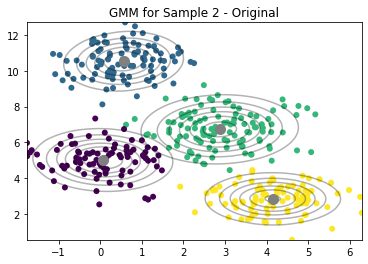

In [18]:
#New GMM for Dataset 2
X = sample2
fig = plt.figure()
classes = Original_values_2
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X[:,0], X[:,1], c=classes, lw=0)
ax.set_title("GMM for Sample 2 - Original")

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for m,c in zip(testGMM_many.means,testGMM_many.covs):
  multi_normal = multivariate_normal(mean=m,cov=c)
  ax.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
  ax.scatter(m[0],m[1],c='grey',zorder=10,s=100)

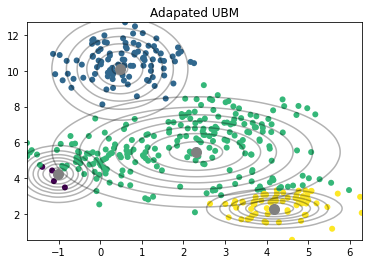

In [19]:
#Dataset 2 fitted on UBM with new mean, new variance, new weights

X = sample2
fig = plt.figure()
classes = Predicted_values_2
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(X[:,0], X[:,1], c=classes, lw=0)
ax.set_title("Adapated UBM")

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for m,c in zip(new_mean,new_var):
  multi_normal = multivariate_normal(mean=m,cov=c)
  ax.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
  ax.scatter(m[0],m[1],c='grey',zorder=10,s=100)


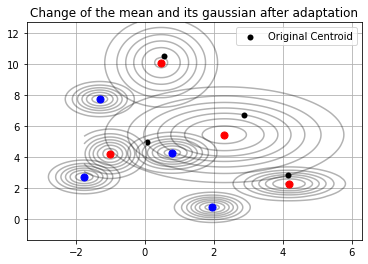

In [20]:
#Change in the Shape of contour after updating the weights on Sample 2

X = sample1
fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(testGMM_many_mean[:, 0], testGMM_many_mean[:, 1],c='k', lw=0)
ax.set_title("Change of the mean and its gaussian after adaptation")

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for m,c in zip(old_mean,var):
  multi_normal = multivariate_normal(mean=m,cov=c)
  ax.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
  ax.scatter(m[0],m[1],c='blue',zorder=10,s=50)

ax.legend(['Original Centroid'])
X = sample2
classes = Predicted_values_2



x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T
for m,c in zip(new_mean,new_var):
  multi_normal = multivariate_normal(mean=m,cov=c)
  ax.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
  ax.scatter(m[0],m[1],c='red',zorder=19,s=50)

ax.grid(True)